In [1]:
pwd

'/Users/mialu/Documents/Course22Fall/TReNDS/MeshEvaluation/fig20'

# import library

In [2]:
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import pickle

import os
import warnings
warnings.filterwarnings('ignore')

/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
f = os.path.join('df.pkl')

with open(f,'rb') as file:
    df = pickle.load(file)

surf_rm_list = ['cortexode-rm','corticalflow-rm','deepcsr-rm','cortexode-gt-rm','pialnn-rm','vox2cortex-rm','topofit-rm']
surf_list = ['cortexode','corticalflow','deepcsr','cortexode-gt','pialnn','vox2cortex','topofit']

df2 = df[df['model_name'].isin(surf_list)]
df3 = df[df['model_name'].isin(surf_rm_list)]

In [4]:
sns.set(rc={'figure.figsize':(13,4)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

In [5]:
df2.model_name.unique()

array(['cortexode', 'cortexode-gt', 'corticalflow', 'deepcsr',
       'vox2cortex', 'pialnn', 'topofit'], dtype=object)

In [6]:
df3.model_name.unique()

array(['cortexode-rm', 'corticalflow-rm', 'deepcsr-rm', 'vox2cortex-rm',
       'pialnn-rm', 'topofit-rm', 'cortexode-gt-rm'], dtype=object)

In [7]:
df2_pial = df2[df2['surface'] == 'pial']
df2_white = df2[df2['surface'] == 'white']
df3_pial = df3[df3['surface'] == 'pial']
df3_white = df3[df3['surface'] == 'white']

df2_pial['cut or no cut'] = ['Original'] * len(df2_pial)
df2_white['cut or no cut'] = ['Original'] * len(df2_white)
df2_pial = df2_pial[['ratio_percent','model_name','cut or no cut']]
df2_white = df2_white[['ratio_percent','model_name','cut or no cut']]

df3_pial['cut or no cut'] = ['Medial wall removed'] * df3_pial.shape[0]
df3_white['cut or no cut'] = ['Medial wall removed'] * df3_white.shape[0]
df3_pial = df3_pial[['model_name','ratio_percent','cut or no cut']]
df3_white = df3_white[['model_name','ratio_percent','cut or no cut']]

In [8]:
m1 = 'cortexode-gt'
m2 = 'cortexode-gt-rm'
np.median(df3_white[df3_white['model_name']==m2]['ratio_percent'])

0.0

In [9]:
np.median(df2_white[df2_white['model_name']==m1]['ratio_percent'])

0.0

In [10]:
replace_dic={'cortexode':'CortexODE','corticalflow':'CorticalFlow','deepcsr':"DeepCSR",
            'vox2cortex':'Vox2Cortex','cortexode-gt':'*FreeSurfer','pialnn':'PialNN',
            'topofit':'Topofit','cortexode-rm':'CortexODE','corticalflow-rm':'CorticalFlow','deepcsr-rm':"DeepCSR",
            'vox2cortex-rm':'Vox2Cortex','cortexode-gt-rm':'*FreeSurfer','pialnn-rm':'PialNN',
            'topofit-rm':'Topofit'}

df2_pial = df2_pial.replace(replace_dic)
df2_white = df2_white.replace(replace_dic)
df3_pial = df3_pial.replace(replace_dic)
df3_white = df3_white.replace(replace_dic)

In [11]:
order1 = ['PialNN','Vox2Cortex','CortexODE','CorticalFlow','*FreeSurfer','DeepCSR']
order2 = ['Vox2Cortex','CorticalFlow','CortexODE','Topofit','*FreeSurfer','DeepCSR']

In [12]:
# reorder pial data
merged_df = pd.concat([df2_pial, df3_pial], ignore_index=True)
custom_order = order1  # Example list with arbitrary order
df_pial = merged_df.sort_values(by=['model_name','cut or no cut'], key=lambda x: x.astype('category').cat.set_categories(custom_order), ascending=[True,False])


merged_df = pd.concat([df2_white, df3_white], ignore_index=True)
custom_order = order2  # Example list with arbitrary order
df_white = merged_df.sort_values(by=['model_name','cut or no cut'], key=lambda x: pd.Categorical(x, categories=custom_order, ordered=True), ascending=[True, False])


In [13]:
M = 'model_name'
P = 'ratio_percent'

pial_medians = []
for m in order1:
    tmp = df_pial
    tmp = tmp[tmp[M]==m]

    pial_medians.append(round(np.median(tmp[tmp['cut or no cut']=='Original'][P]),2))
    pial_medians.append(round(np.median(tmp[tmp['cut or no cut']=='Medial wall removed'][P]),2))



white_medians = []
for m in order2:
    tmp = df_white
    tmp = tmp[tmp[M]==m]
    t1 = np.median(tmp[tmp['cut or no cut']=='Original'][P])
    t2 = np.median(tmp[tmp['cut or no cut']=='Medial wall removed'][P])
    white_medians.append(t1)
    white_medians.append(t2)

white_medians = [round(u,2) for u in white_medians]

In [14]:
def plot2(tips, x = "model_name", y = "ratio_percent", hue = 'surface',name='Pial', maxy = 7, model='pial',round2=2,alpha=.6,color = sns.color_palette("Set2", 10),miny=-2,y_pos=-1):
    sns.stripplot(x=x, y=y, hue=hue,
    data=tips, jitter=True,
    palette="Set2", split=True,linewidth=1,edgecolor='gray',alpha=alpha,hue_order=['Original','Medial wall removed'])

    # Get the ax object to use later.
    ax = sns.boxplot(x=x,y=y,hue=hue,
    data=tips,palette="Set2",fliersize=0,hue_order=['Original','Medial wall removed'])


    if model == 'pial':
        medians = pial_medians
    else:
        medians = white_medians
    
    vertical_offset = -.2

    # Get the handles and labels. For this example it'll be 2 tuples
    # of length 4 each.
    handles, labels = ax.get_legend_handles_labels()
    
#     print(len(ax.get_xticks()))
#     print(len(medians))

    c1,c2 = color[0],color[1]
    
    if name=='Pial':

        for xtick in ax.get_xticks():
            if xtick < 2:
                idx = 2 * xtick
                ax.text(xtick - .54,medians[idx] + vertical_offset,medians[2 * xtick], 
                    horizontalalignment='center',size='x-small',color=c1,weight='semibold')

                idx = 2 * xtick + 1
                ax.text(xtick + .52,medians[idx] + vertical_offset,medians[2 * xtick + 1], 
                    horizontalalignment='center',size='x-small',color=c2,weight='semibold')
            else:
                idx = 2 * xtick
                ax.text(xtick-.2,-1.5,medians[2 * xtick], 
                    horizontalalignment='center',size='x-small',color=c1,weight='semibold')

                idx = 2 * xtick + 1
                ax.text(xtick + .2,-1.5,medians[2 * xtick + 1], 
                    horizontalalignment='center',size='x-small',color=c2,weight='semibold')               
                
            
    else:
        y_pos = y_pos
        for xtick in ax.get_xticks():
            idx = 2 * xtick
            ax.text(xtick - .2, y_pos, medians[2 * xtick],
                horizontalalignment='center',size='x-small',color=c1,weight='semibold')

            idx = 2 * xtick + 1
            ax.text(xtick + .2, y_pos,medians[2 * xtick + 1], 
                horizontalalignment='center',size='x-small',color=c2,weight='semibold')
                

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    if name=='Pial':
        l = plt.legend(handles[0:2], ['Spherical topology','Medial wall removed'], loc='upper right', borderaxespad=0.,facecolor='white',edgecolor='white')
    else:
        legend = plt.legend()
        legend.remove()
     
    # plt.ylabel('Collision counts / Triangle counts (%)')
    plt.xlabel('')
    # plt.yscale('log')
    plt.ylabel('self-intersections (%)')
    plt.xlim(-.7,5.5)
    plt.ylim(miny,maxy)
    plt.text(0.02, .98, name, ha='left', va='top', transform=ax.transAxes, fontsize=15, weight='bold')
    plt.savefig('FIG20-selfCollisions-{}.png'.format(name), dpi=300)
    plt.savefig('FIG20-selfCollisions-{}.svg'.format(name), format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

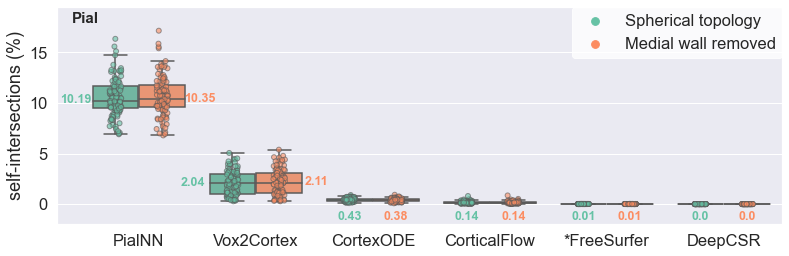

In [15]:
plot2(df_pial, M,P,"cut or no cut",'Pial',19.5,'pial')

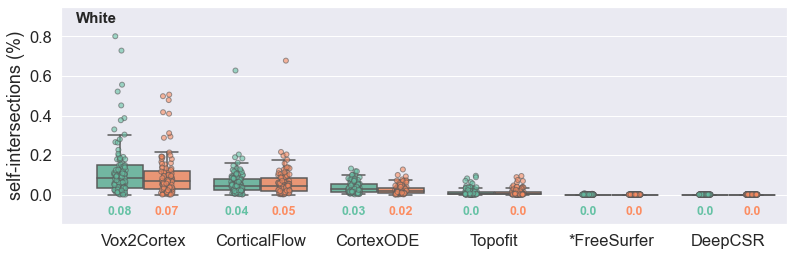

In [16]:
plot2(df_white, M,P,"cut or no cut",'White',.95,'white',miny=-.15,y_pos=-.1)